# Aplicamos el algoritmo de los anteriores ejercicios para determinar con los datos del enunciado con que modelo debemos trabajar

Grado 1:
  Coeficientes: [-2.25496975e-03  1.31464996e+01]
  Error (MSE): 0.411827139152982
  Fórmula: -2.2550e-03x + 1.3146e+01

Grado 2:
  Coeficientes: [ 6.34947528e-07 -6.51125846e-03  1.96910250e+01]
  Error (MSE): 0.036449014196150084
  Fórmula: 6.3495e-07x^2 + -6.5113e-03x + 1.9691e+01

Grado 3:
  Coeficientes: [ 9.98800051e-11 -3.69685029e-07 -3.33595043e-03  1.65706566e+01]
  Error (MSE): 0.03379539672646789
  Fórmula: 9.9880e-11x^3 + -3.6969e-07x^2 + -3.3360e-03x + 1.6571e+01

Exponencial:
  Coeficientes: [-3.98405117e-04  2.97958823e+00]
  Error (MSE): 0.0893150512945805
  Fórmula: 1.9680e+01 * e^(-3.9841e-04x)

Potencia:
  Coeficientes: [-1.24341843 11.68156477]
  Error (MSE): 0.08782140206097629
  Fórmula: 1.1837e+05 * x^-1.2434e+00

El modelo más eficiente es Grado 3 con un MSE de 0.0338


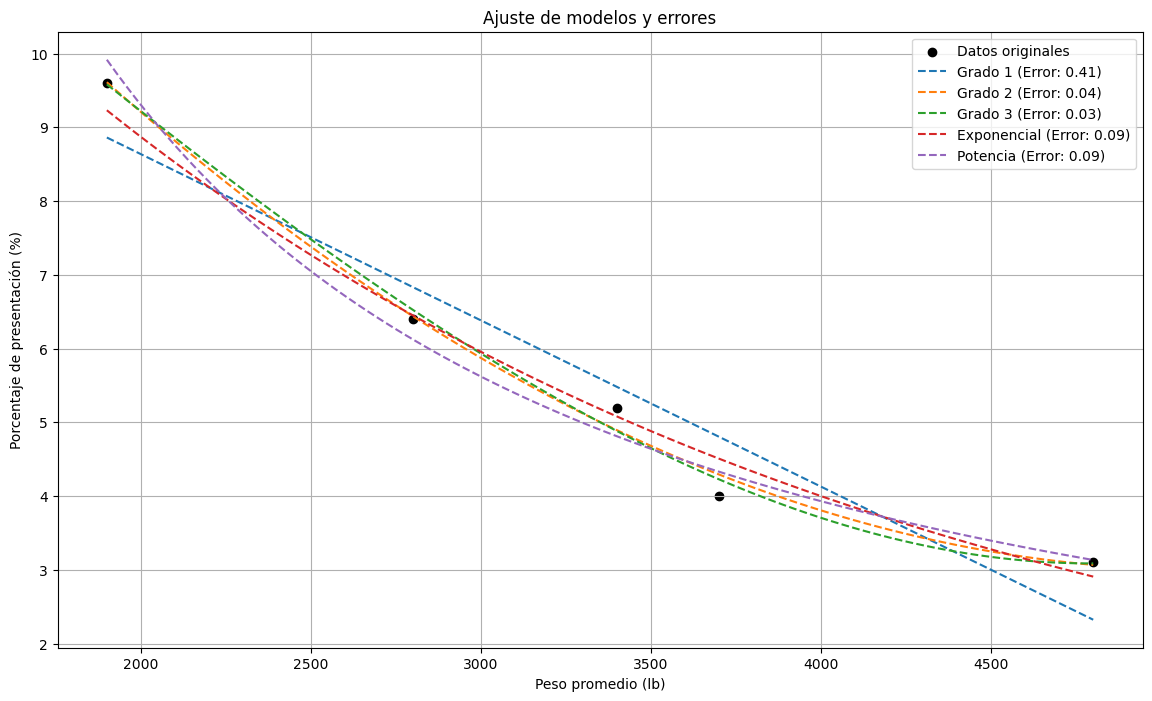

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

peso_promedio = np.array([4800, 3700, 3400, 2800, 1900])
porcentaje_presentacion = np.array([3.1, 4, 5.2, 6.4, 9.6])

# Ajuste lineal (polinomio de grado 1)
coeffs_1 = np.polyfit(peso_promedio, porcentaje_presentacion, 1)
p1 = np.poly1d(coeffs_1)
y_pred_1 = p1(peso_promedio)
error_1 = mean_squared_error(porcentaje_presentacion, y_pred_1)

# Ajuste polinomial de grado 2
coeffs_2 = np.polyfit(peso_promedio, porcentaje_presentacion, 2)
p2 = np.poly1d(coeffs_2)
y_pred_2 = p2(peso_promedio)
error_2 = mean_squared_error(porcentaje_presentacion, y_pred_2)

# Ajuste polinomial de grado 3
coeffs_3 = np.polyfit(peso_promedio, porcentaje_presentacion, 3)
p3 = np.poly1d(coeffs_3)
y_pred_3 = p3(peso_promedio)
error_3 = mean_squared_error(porcentaje_presentacion, y_pred_3)

# Ajuste exponencial (transformación logarítmica)
log_yi = np.log(porcentaje_presentacion)
coeffs_exp = np.polyfit(peso_promedio, log_yi, 1)
a_exp = coeffs_exp[0]
b_exp = np.exp(coeffs_exp[1])
y_pred_exp = b_exp * np.exp(a_exp * peso_promedio)
error_exp = mean_squared_error(porcentaje_presentacion, y_pred_exp)

# Ajuste de potencia (transformación logarítmica)
log_xi = np.log(peso_promedio)
log_yi = np.log(porcentaje_presentacion)
coeffs_pow = np.polyfit(log_xi, log_yi, 1)
a_pow = coeffs_pow[0]
b_pow = np.exp(coeffs_pow[1])
y_pred_pow = b_pow * peso_promedio ** a_pow
error_pow = mean_squared_error(porcentaje_presentacion, y_pred_pow)

resultados = {
    'Grado 1': {'Coeficientes': coeffs_1, 'Error': error_1, 'Modelo': p1, 'Fórmula': f"{coeffs_1[0]:.4e}x + {coeffs_1[1]:.4e}"},
    'Grado 2': {'Coeficientes': coeffs_2, 'Error': error_2, 'Modelo': p2, 'Fórmula': f"{coeffs_2[0]:.4e}x^2 + {coeffs_2[1]:.4e}x + {coeffs_2[2]:.4e}"},
    'Grado 3': {'Coeficientes': coeffs_3, 'Error': error_3, 'Modelo': p3, 'Fórmula': f"{coeffs_3[0]:.4e}x^3 + {coeffs_3[1]:.4e}x^2 + {coeffs_3[2]:.4e}x + {coeffs_3[3]:.4e}"},
    'Exponencial': {'Coeficientes': coeffs_exp, 'Error': error_exp, 'Modelo': lambda x: b_exp * np.exp(a_exp * x), 'Fórmula': f"{b_exp:.4e} * e^({a_exp:.4e}x)"},
    'Potencia': {'Coeficientes': coeffs_pow, 'Error': error_pow, 'Modelo': lambda x: b_pow * x ** a_pow, 'Fórmula': f"{b_pow:.4e} * x^{a_pow:.4e}"}
}

for key, value in resultados.items():
    print(f"{key}:")
    print(f"  Coeficientes: {value['Coeficientes']}")
    print(f"  Error (MSE): {value['Error']}")
    print(f"  Fórmula: {value['Fórmula']}")
    print()

mejor_modelo = min(resultados, key=lambda x: resultados[x]['Error'])
print(f"El modelo más eficiente es {mejor_modelo} con un MSE de {resultados[mejor_modelo]['Error']:.4f}")
plt.figure(figsize=(14, 8))
plt.scatter(peso_promedio, porcentaje_presentacion, color='black', label='Datos originales')
x_fit = np.linspace(min(peso_promedio), max(peso_promedio), 100)
for key, value in resultados.items():
    if key in ['Exponencial', 'Potencia']:
        plt.plot(x_fit, value['Modelo'](x_fit), label=f'{key} (Error: {value["Error"]:.2f})', linestyle='--')
    else:
        plt.plot(x_fit, value['Modelo'](x_fit), label=f'{key} (Error: {value["Error"]:.2f})', linestyle='--')
plt.xlabel('Peso promedio (lb)')
plt.ylabel('Porcentaje de presentación (%)')
plt.title('Ajuste de modelos y errores')
plt.legend()
plt.grid(True)
plt.show()


## Codigo con el modelo de Grado 3

Grado 3:
  Coeficientes: [ 9.98800051e-11 -3.69685029e-07 -3.33595043e-03  1.65706566e+01]
  Error (MSE): 0.03379539672646789
  Fórmula: 9.9880e-11x^3 + -3.6969e-07x^2 + -3.3360e-03x + 1.6571e+01



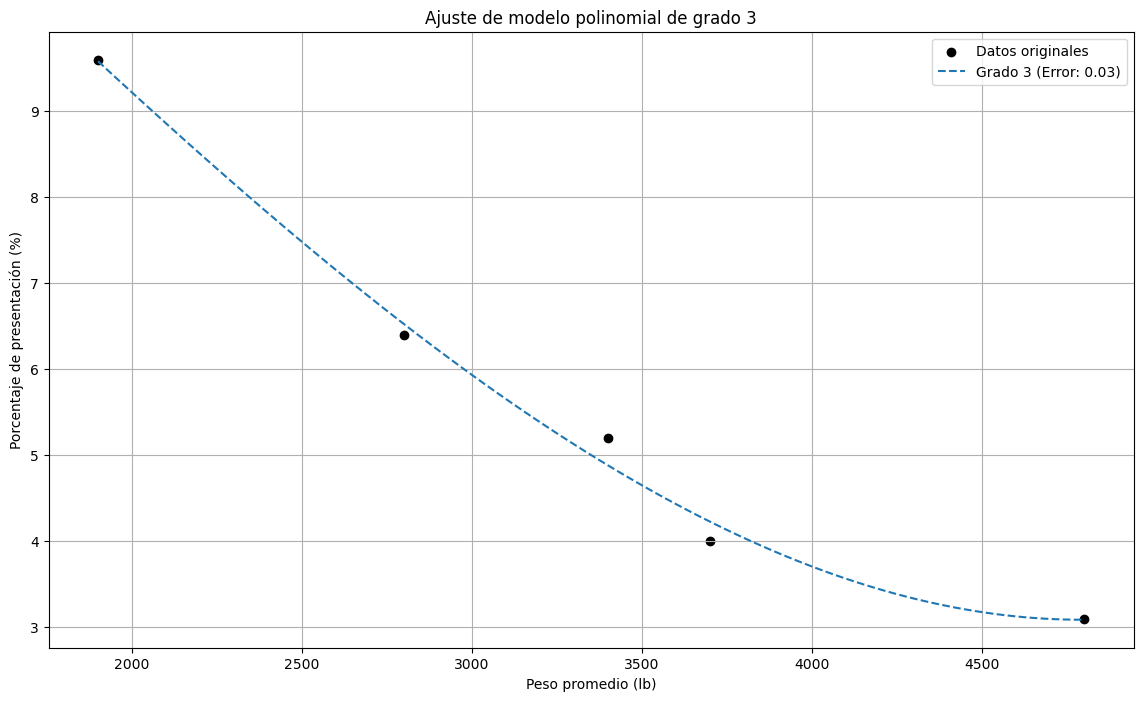

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

peso_promedio = np.array([4800, 3700, 3400, 2800, 1900])
porcentaje_presentacion = np.array([3.1, 4, 5.2, 6.4, 9.6])

# Ajuste polinomial de grado 3
coeffs_3 = np.polyfit(peso_promedio, porcentaje_presentacion, 3)
p3 = np.poly1d(coeffs_3)
y_pred_3 = p3(peso_promedio)
error_3 = mean_squared_error(porcentaje_presentacion, y_pred_3)
formula_3 = f"{coeffs_3[0]:.4e}x^3 + {coeffs_3[1]:.4e}x^2 + {coeffs_3[2]:.4e}x + {coeffs_3[3]:.4e}"

print("Grado 3:")
print(f"  Coeficientes: {coeffs_3}")
print(f"  Error (MSE): {error_3}")
print(f"  Fórmula: {formula_3}")
print()

plt.figure(figsize=(14, 8))
plt.scatter(peso_promedio, porcentaje_presentacion, color='black', label='Datos originales')
x_fit = np.linspace(min(peso_promedio), max(peso_promedio), 100)
plt.plot(x_fit, p3(x_fit), label=f'Grado 3 (Error: {error_3:.2f})', linestyle='--')
plt.xlabel('Peso promedio (lb)')
plt.ylabel('Porcentaje de presentación (%)')
plt.title('Ajuste de modelo polinomial de grado 3')
plt.legend()
plt.grid(True)
plt.show()
